# Lesson 3. Neural Network for Iris Classification

In this lesson we will build a simple Neural Network for the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). Before diving into the code we must explain some concepts to understand what this Neural Networks are.

## 3.1. Concepts

In this image there are three levels of abstraction that we will explain: Artificial Intelligence, Machine Leaning and Artificial Neural Networks. Deep Learning will be seen in the following chapter

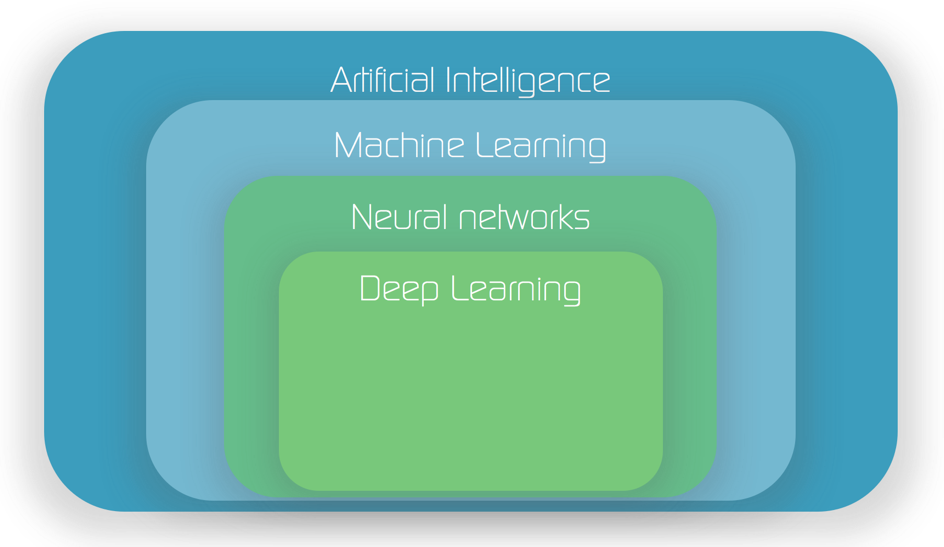

Image source: https://www.bambu.life/blog/2019/2/26/how-machine-learning-is-changing-software-development

### 3.1.1. Artificial Intelligence (AI)

Artificial intelligence can be understood as intelligence demonstrated by machines. It covers many fields of study, it covers from basic patron recognition in a sequence using just a for loop to complex image recognition models using deep learning.

### 3.1.2. Machine Learning (ML)

Machine learning (ML) is the study of computer algorithms that can improve automatically by iterating through a dataset. It is a part of Artificial Intelligence. The difference as we said is that it uses models that can improve the accuracy in the results by learning from a data set.

### 3.1.3. Artificial Neural Networks (ANNs)

Artificial Neural Networks are algorithms inspired by the biological neural network system inside the animal brain. It is a collection of different units connected to each other called artificial neurons. Each neuron receives a signal with a certain value (information), applies a function to that value and passes it to the next neuron.

The models are often trained to make predictions (output) from a given data (input). When training, the improvement is measured by the error which is the difference between the processed output of the network (what estimates) and a target output (what should be).

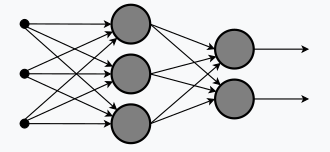

Image source: https://en.wikipedia.org/wiki/Sentence_embedding

#### Layers

The layers that we will see in this basic ANN is the **Dense** layer. It is a linear array of data fully connected to the next layer.

In a ANN, the input comes to the first layer which each neuron calculates from the value of the neurons from the previous layer and with weights:

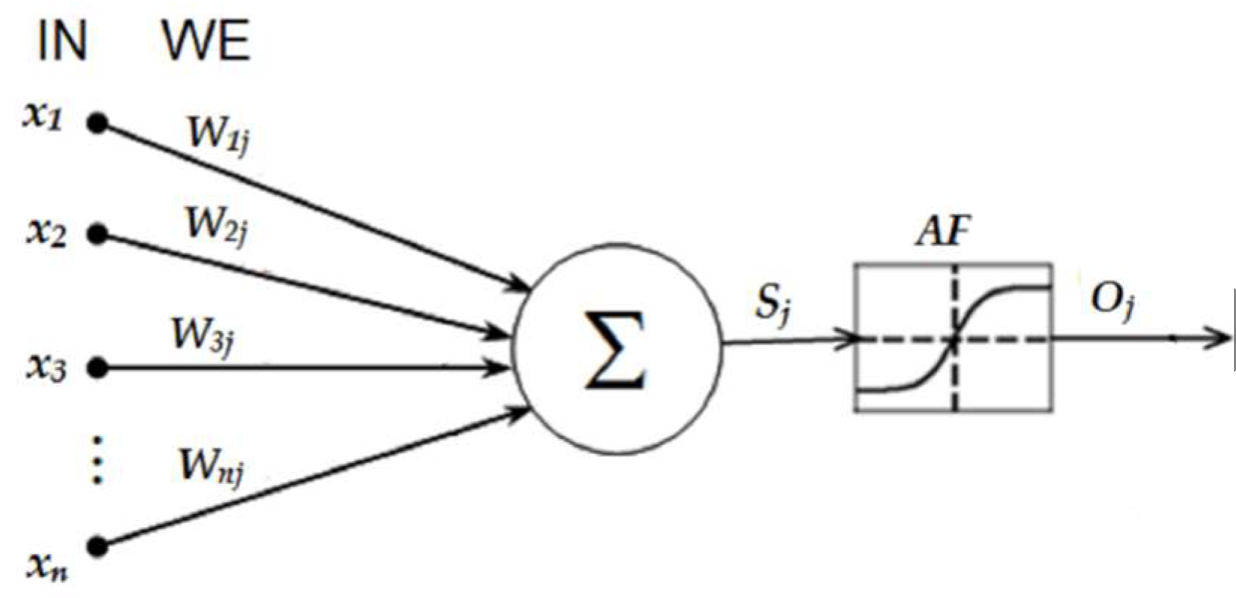

* Each neuron uses all the neuron connections from the previous layer $x_n$
* Multiplies its values with the weights given to each connection $W_{nj}$ 
* Then it sums all its values $\sum{x_n\times W_{nj}}$
* That value passes through an activation function (Sigmoid, relu, tanh...)
* The result will pass to the next layer. If fully connected (Dense) to all the neurons of that layer

For example. If this was a problem that the neural network has to classify between three possible cases, the last layer would be a Dense layer with three neurons. From the connections of the previous layer, some of these neurons will have values higher than the others, and the one with higher value would be the final decision. Supposing that the neural network works well, when the value of a neuron, it means that a pattern that that neuron found is relevant.

This seems pretty simple... and it is! The magic here is that the algorithm has to modify the weights of all the connections (which are a lot) in each iteration to make the artificial network learn using gradient descent. The values of the weights are initialized randomly. If you want to know more check [this video animation made by 3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk&list=RDCMUCYO_jab_esuFRV4b17AJtAw&index=4) that explains incredibly well how these ANNs work.

### 3.1.4. Understanding the dataset

Even tho the dataset is simpler for the neural network, for us is not that simple to infer the category of the flower type with just a few measurements. In the [UCI](https://archive.ics.uci.edu/ml/index.html) web page we find many different datasets for machine learning scientist, with the explanation of their attributes:

* 1. Sepal length in cm
* 2. Sepal width in cm
* 3. Petal length in cm
* 4. Petal width in cm

The three classes are: 
* Iris Setosa
* Iris Versicolour
* Iris Virginica

This is a very simple dataset that is very well known.

## 3.2. Examples

### Example 1. Load the Data

We will download the dataset using the *sklearn* library with the method *load_iris* which are the iris measurements.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

Our values are arrays with four items. 

In [ ]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The labels are integer as usual

In [ ]:
y[0:5]

array([0, 0, 0, 0, 0])

### Example 2. Prepare the data

Now we will prepare the data for the keras neural network. In the previous example we had the data split in train data and validation data. Now we will only use train and test data, the test data is going to be use at the end when the model is trained, to see if it actually works well.
We can achieve this by simply shuffling the data and split with ranges.

Using ```zip``` we merge two lists. Then we shuffle them using the *shuffle* function in the *random* library

In [ ]:
import random

all_data = list(zip(X,y))
print('Not shuffled: ', all_data[0])
random.shuffle(all_data)
print('Shuffled: ', all_data[0])

Not shuffled:  (array([5.1, 3.5, 1.4, 0.2]), 0)
Shuffled:  (array([5.8, 2.7, 3.9, 1.2]), 1)


To know how what range of items to take we must know the length

In [ ]:
length = len(all_data)
length

150

With a 10% of the training data will be ok to test the neural network. To unzip the list into the two lists inside we use again ```zip``` with the operator ```*``` inside.

In [ ]:
import numpy as np
train_data = all_data[0:140]
test_data = all_data[140:150]

X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

X_train = np.array(X_train)
X_test = np.array(X_test)

print('Train data length: ', len(X_train))
print('Test data length: ', len(X_test))

Train data length:  140
Test data length:  10


And just like in the other categorical neural networks, the labels must be like an array of 0s and 1s for the keras model.

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 1., 0.], dtype=float32)

### Example 3. Build the model

Because this dataset is very easy, we don't need a fancy model with many layers. Also because this is not an image problem we don't need convolution in our layers (which means finding patterns in a image).

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(units=512, activation='relu', input_shape=(4,)))
model.add(layers.Dense(3, activation='softmax'))

### Example 4. Compile the model

The model can be compiles with the rmsprop optimizer. The loss must be categorical_crossentropy because this is a category classification. For the metrics we will track the accuracy.

In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

###Example 5. Train the model

Using the *fit* method we will train the model, with 20 epochs and a batch_size of 32

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 0.9837 - accuracy: 0.4929
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7842 - accuracy: 0.7000
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.7786
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.8143
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.7929
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.8357
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7786
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.8714
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.8500
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8071
Epoch 11/50
5/5 [======================

### Example 6. Test the model

To test the model we will use the *evaluate* method of the model passing the test values and labels

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1/1 [==============================] - 0s 210ms/step - loss: 0.1359 - accuracy: 0.9000
Test Accuracy:  0.8999999761581421 
Test Loss:  0.13587960600852966


## 3.3. Final exercise

### Exercise 1. Load the Data

Load the data from the *keras.datasets* library with the method *load_iris* and obtain the X and y from the *data* and *taget*

In [ ]:
# Get the data


In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Exercise 2. Prepare the data

Prepare the data by shuffling it.

In [ ]:
# shuffle the data


In [ ]:
all_data = list(zip(X,y))
random.shuffle(all_data)

Split the data in train data and test data (X_train, y_train, X_test, y_test). For the train take 140 and, for the test, 10. Remember to convert the final X_train and X_test to a numpy array.

In [ ]:
# Split the train and test data


In [ ]:
train_data = all_data[0:140]
test_data = all_data[140:150]

X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

X_train = np.array(X_train)
X_test = np.array(X_test)

Convert the y_train and y_test to categorical using the *keras.utils* *to_categorical* function

In [ ]:
# convert the ys to categorical


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Exercise 3. Build the model

Build a Sequential model with layers:
* Dense: units=(determine it), activation=(determine it), input_shape=(4,)
* Dense: units=3, activation=softmax

In [ ]:
# Build the model


In [ ]:
model = models.Sequential()
model.add(layers.Dense(units=512, activation='relu', input_shape=(4,)))
model.add(layers.Dense(3, activation='softmax'))

### Exercise 4. Compile the model

Compile the model with:
* optimizer=rmsprop
* loss=(determine it)

In [ ]:
# Compile the model


In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Exercise 5. Train the model

Train the model
* epochs=(determine it)
* batch_size=32

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.9412 - accuracy: 0.6714
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.8214
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.7286
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.7429
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.8643
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.9143
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.8714
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.8571
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.8357
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8571
Epoch 11/50
5/5 [======================

### Exercise 6. Test the model

Test the model with the test data.

In [ ]:
# test the model


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1/1 [==============================] - 0s 117ms/step - loss: 0.0677 - accuracy: 1.0000
Test Accuracy:  1.0 
Test Loss:  0.06770722568035126
